# Import Libraries

In [1]:
from read_data import combine_all, combine_category, read_data

In [2]:
import pandas as pd    
import numpy as np    
import seaborn as sns
import os

In [3]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Scrapped Data

In [5]:
df = combine_all()

In [6]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.drop(['Name', 'Time', 'Likes', 'Reply Count\r', 'Reply Count'], axis=1, inplace=True)

# Cleaning Comments from the data

In [11]:
df["Comment"]=df["Comment"].astype(str)

In [12]:
df["Comment"][0]

'Like I said in the video, subscribe if you haven’t already and you could win $10,000!'

In [13]:
from cleantext import clean


for index, comment in enumerate(df['Comment']):
    df.loc[index, "Comment"] = clean(comment,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=True,         # replace all phone numbers with a special token
        no_numbers=True,               # replace all numbers with a special token
        no_digits=True,                # replace all digits with a special token
        no_currency_symbols=True,      # replace all currency symbols with a special token
        no_punct=True,                 # remove punctuations
        no_emoji=True,
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
        lang="en"                       # set to 'de' for German special handling
    )

In [14]:
df

,Comment
0,like i said in the video subscribe if you have...
1,irlsquid game already irl
2,eyyyyyyy wassup night fox
3,after reject netflix
4,some people just made the marbles game so conf...
...,...
1507301,first
1507302,first
1507303,hi
1507304,i have nothing to say but spongbob my boy


In [15]:
sentid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Comment"].apply(lambda x:sentid.polarity_scores(x))
df = pd.concat([df.drop(["sentiments"],axis=1),df["sentiments"].apply(pd.Series)],axis=1)
df

,Comment,neg,neu,pos,compound
0,like i said in the video subscribe if you have...,0.000,0.656,0.344,0.7430
1,irlsquid game already irl,0.000,1.000,0.000,0.0000
2,eyyyyyyy wassup night fox,0.000,1.000,0.000,0.0000
3,after reject netflix,0.574,0.426,0.000,-0.4019
4,some people just made the marbles game so conf...,0.184,0.590,0.227,0.1499
...,...,...,...,...,...
1507301,first,0.000,1.000,0.000,0.0000
1507302,first,0.000,1.000,0.000,0.0000
1507303,hi,0.000,1.000,0.000,0.0000
1507304,i have nothing to say but spongbob my boy,0.000,1.000,0.000,0.0000


In [48]:
def classify(compound):
    if compound > 0:
        return 'Positive'
    elif compound == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [49]:
df['Sentiment'] = df['compound'].apply(classify)

In [50]:
data = df.sample(frac=1).reset_index(drop=True)

# Visualisations

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

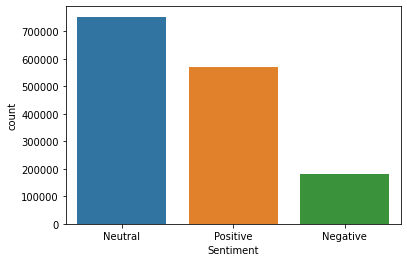

In [51]:
sns.countplot(x='Sentiment', data=data)

In [52]:
negative = data[data.Sentiment == 'Negative'].head(182000)
positive = data[data.Sentiment == 'Positive'].head(200000)
neutral = data[data.Sentiment == 'Neutral'].head(200000)

In [55]:
dataset = pd.concat([negative, positive, neutral], axis=0).sample(frac=1).reset_index(drop=True)

In [56]:
dataset.to_csv('dataset.csv')

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

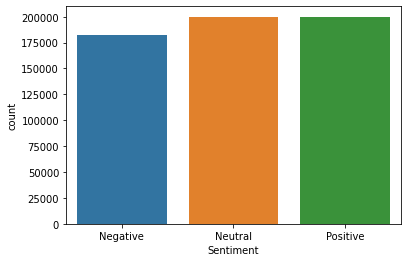

In [57]:
sns.countplot(x='Sentiment', data=dataset)

In [58]:
dataset

,Comment,neg,neu,pos,compound,Sentiment
0,chris watching them eat food why are we still ...,0.127,0.873,0.000,-0.5423,Negative
1,,0.000,0.000,0.000,0.0000,Neutral
2,a,0.000,0.000,0.000,0.0000,Neutral
3,noted,0.000,1.000,0.000,0.0000,Neutral
4,cuando en espanol,0.000,1.000,0.000,0.0000,Neutral
...,...,...,...,...,...,...
581995,dongyangin ggyeoissneungeo kingbadne jeosaeggi...,0.000,1.000,0.000,0.0000,Neutral
581996,plz come to bhangarh,0.000,0.698,0.302,0.0772,Positive
581997,i got brawl stars and it is very fun,0.000,0.661,0.339,0.5563,Positive
581998,,0.000,0.000,0.000,0.0000,Neutral
